<a href="https://colab.research.google.com/github/anumsajid13/Fabricae-FYP/blob/main/Copy_of_clip_interrogator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIP Interrogator 2.4 by [@pharmapsychotic](https://twitter.com/pharmapsychotic)

Want to figure out what a good prompt might be to create new images like an existing one? The CLIP Interrogator is here to get you answers!

<br>

For Stable Diffusion 1.X choose the **ViT-L** model and for Stable Diffusion 2.0+ choose the **ViT-H** CLIP Model.

This version is specialized for producing nice prompts for use with Stable Diffusion and achieves higher alignment between generated text prompt and source image. You can try out the old [version 1](https://colab.research.google.com/github/pharmapsychotic/clip-interrogator/blob/v1/clip_interrogator.ipynb) to see how different CLIP models ranks terms.

You can also run this on HuggingFace and Replicate<br>
[![Generic badge](https://img.shields.io/badge/🤗-Open%20in%20Spaces-blue.svg)](https://huggingface.co/spaces/pharma/CLIP-Interrogator) [![Replicate](https://replicate.com/pharmapsychotic/clip-interrogator/badge)](https://replicate.com/pharmapsychotic/clip-interrogator)

<br>

If this notebook is helpful to you please consider buying me a coffee via [ko-fi](https://ko-fi.com/pharmapsychotic) or following me on [twitter](https://twitter.com/pharmapsychotic) for more cool Ai stuff. 🙂

And if you're looking for more Ai art tools check out my [Ai generative art tools list](https://pharmapsychotic.com/tools.html).


In [ ]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7a2ff042-7ee3-8f0b-36d2-658627ae4859)


In [ ]:
#@title Setup
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install', 'gradio'],
        ['pip', 'install', 'open_clip_torch'],
        ['pip', 'install', 'clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


caption_model_name = 'blip-large' #@param ["blip-base", "blip-large", "git-large-coco"]
clip_model_name = 'ViT-L-14/openai' #@param ["ViT-L-14/openai", "ViT-H-14/laion2b_s32b_b79k"]

import gradio as gr
from clip_interrogator import Config, Interrogator

config = Config()
config.clip_model_name = clip_model_name
config.caption_model_name = caption_model_name
ci = Interrogator(config)

def image_analysis(image):
    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}

    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

def image_to_prompt(image, mode):
    ci.config.chunk_size = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    ci.config.flavor_intermediate_count = 2048 if ci.config.clip_model_name == "ViT-L-14/openai" else 1024
    image = image.convert('RGB')
    if mode == 'best':
        return ci.interrogate(image)
    elif mode == 'classic':
        return ci.interrogate_classic(image)
    elif mode == 'fast':
        return ci.interrogate_fast(image)
    elif mode == 'negative':
        return ci.interrogate_negative(image)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existin

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading CLIP model ViT-L-14/openai...


100%|███████████████████████████████████████| 933M/933M [00:16<00:00, 55.1MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 85.4MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:00<00:00, 237MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 11.2MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 13.2MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 10.8MB/s]
ViT-L-14_openai_negative.safetensors: 100%|██████████| 63.2k/63.2k [00:00<00:00, 10.7MB/s]

Loaded CLIP model and data in 30.88 seconds.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Image to prompt! 🖼️ -> 📝

def prompt_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
            with gr.Column():
                mode = gr.Radio(['best', 'fast', 'classic', 'negative'], label='Mode', value='best')
        prompt = gr.Textbox(label="Prompt")
    button = gr.Button("Generate prompt")
    button.click(image_to_prompt, inputs=[image, mode], outputs=prompt)

def analyze_tab():
    with gr.Column():
        with gr.Row():
            image = gr.Image(type='pil', label="Image")
        with gr.Row():
            medium = gr.Label(label="Medium", num_top_classes=5)
            artist = gr.Label(label="Artist", num_top_classes=5)
            movement = gr.Label(label="Movement", num_top_classes=5)
            trending = gr.Label(label="Trending", num_top_classes=5)
            flavor = gr.Label(label="Flavor", num_top_classes=5)
    button = gr.Button("Analyze")
    button.click(image_analysis, inputs=image, outputs=[medium, artist, movement, trending, flavor])

with gr.Blocks() as ui:
    with gr.Tab("Prompt"):
        prompt_tab()
    with gr.Tab("Analyze"):
        analyze_tab()

ui.launch(show_api=False, debug=False)


Generating prompts:   0%|          | 0/49 [00:00<?, ?it/s]

a close up of a bed with a floral pattern on it, sekiro mountain, wearing a dress of gossamer gold, wallpaper aesthetic, exhibited at the british museum, inspired by Joseph Noel Paton, japanese maples, snapchat story screenshot, beautiful aesthetic design, detail shot, by Ayami Kojima, print


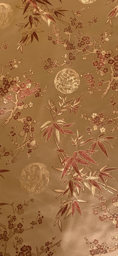

Generating prompts:   2%|▏         | 1/49 [00:33<26:45, 33.45s/it]

a close up of a brown and blue floral pattern on a beige background, indian patterns, rococo!, trending on pinterest. com, by Eleanor Layfield Davis, front side view full sheet, catalog photo, white wall, sandy green, by James Paterson, by Sara Saftleven


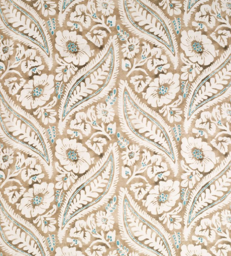

Generating prompts:   4%|▍         | 2/49 [01:04<24:56, 31.84s/it]

a close up of a floral pattern on a white background, 1 8 4 0 s, design milk, gypsy, 16 colors, the scary empty liminal spaces, barry qindsor-smith, vermillion, hasanabi, ( boris johnson ), catalog, marigold, golden trims, blair armitage, image of the day


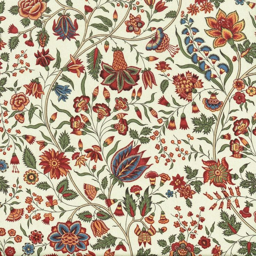

Generating prompts:   6%|▌         | 3/49 [01:45<27:45, 36.21s/it]

a close up of a floral pattern on an orange background, burnt sienna and cerulean blue, trending on pinterest. com, 1 9 1 9, paisley, by Ottilie Maclaren Wallace, freman, hindu, sandstone, 5 colors, brandywine school, coral, bollywood, inspired by William Fettes Douglas


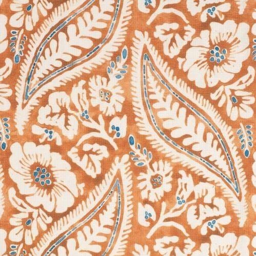

Generating prompts:   8%|▊         | 4/49 [02:24<28:05, 37.45s/it]

a close up of a green and white floral pattern on a table, circa 1 8 5 4, high fashion journal cover, exhibited at the british museum, diaphanous iridescent silks, tonal topstitching, cartier, bengal school of art, the jewelpunk aesthetic, silkscreen, dendrites, gilt


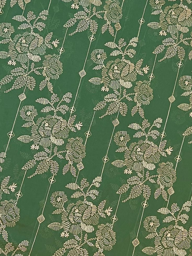

Generating prompts:  10%|█         | 5/49 [02:59<26:46, 36.51s/it]

a close up of a floral design on a beige background, auction catalogue photo, flowing aqua silk, berries, in muted colours, panel, gilt-leaf winnower, twisted gardens, light - brown wall, white tracing, ebay listing, catalog, barnet, round-cropped, from china, linen, images on the sales website


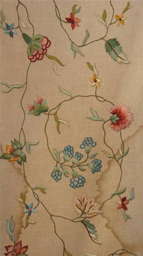

Generating prompts:  12%|█▏        | 6/49 [03:47<28:59, 40.46s/it]

a close up of a white and red wallpaper with a pattern of flowers, indigo! and venetian red!, image on the store website, greta thunberg, inspired by Fitz Henry Lane, bright white castle stones, very nice pastel colors, rubrum lillies, slate, modular detailed, hoses:10, black metal rococo, new release, listing image, indian patterns


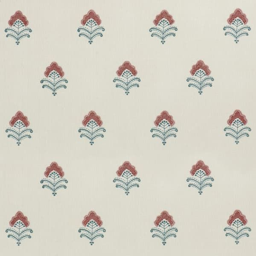

Generating prompts:  14%|█▍        | 7/49 [04:28<28:23, 40.55s/it]

a close up of a floral pattern on a white background, green hills savanna tree, elegant fabric, earth tones and blues, oak, height 1 7 8, hindu aesthetic, inspired by Fairfield Porter, light - brown wall, japanese maples, houzz, resplendent, tents, seaweed


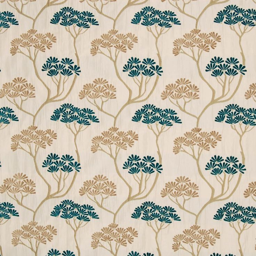

Generating prompts:  16%|█▋        | 8/49 [05:08<27:36, 40.41s/it]

a close up of a pattern of blue leaves on a white background, ffffound, neo - classical style, hermes, white: 0.5, cover, walls, restrained. bloom, whitewashed housed, twee, colonial, lawn, flat triangles, new design, distinct, blue: 0.5, floors, piping


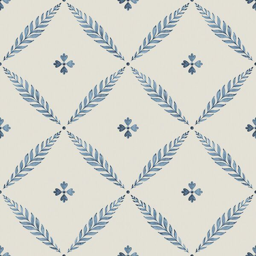

Generating prompts:  18%|█▊        | 9/49 [06:00<29:13, 43.85s/it]

a close up of a pattern of blue flowers on a white background, inspired by Xu Beihong, tavern background, russian clothes, highly detailed product photo, shrubs, template sheet, wearing a white folkdrakt dress, creative commons attribution, james jean aesthetic, images on the sales website, by Bourgeois, by Erwin Bowien, swedish design, very coherent. high detail


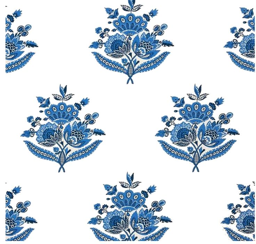

Generating prompts:  20%|██        | 10/49 [06:40<27:44, 42.69s/it]

a close up of a white and red floral pattern on a white background, ffffound, hannah af klint, peach, fronds, private press, wearing a dress of gossamer gold, sand - colored walls, cardstock, fairy circles, zora, office ceiling panels, neoclassical


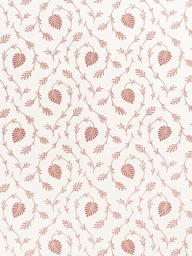

Generating prompts:  22%|██▏       | 11/49 [07:17<26:00, 41.07s/it]

a green and white pattern with white circles on it, ffffound, bird feathers, featured on dribbble, autumn rain turkel, payne's grey, by Kathleen Allen, indian patterns, coral, 9 9 designs, green man, linen, width 768, tiling, product image, fern, blue gray


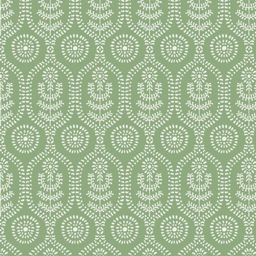

Generating prompts:  24%|██▍       | 12/49 [08:04<26:29, 42.96s/it]

a green and white rug with circles and dots on it, and the uncertainty\', \'emulador\', moonlight grey, arabesque, #green, 100lb cardstock, one of the weavers of destiny, style sheet, reef, parallax »


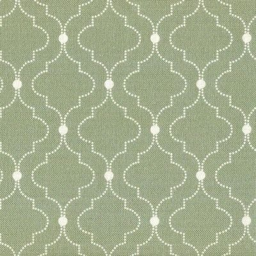

Generating prompts:  27%|██▋       | 13/49 [08:36<23:45, 39.60s/it]

a pattern of small green leaves and dots on a white background, earthy light pastel colours, clear blue sky vintage style, garis edelweiss, inspired by James Paterson, midsommar - t, by Annabel Eyres, high detailed), tropical palms, width 1 0 2 4, pine, kelp


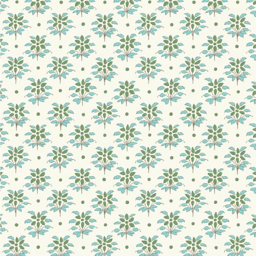

Generating prompts:  29%|██▊       | 14/49 [09:11<22:10, 38.02s/it]

a close up of a rug with a flower design on it, pale muted pastel moody colors, from arcane, grasping intricate filigree, chauvet, inspired by Tosa Mitsuoki, gray men, round-cropped, by Victorine Foot, hollywood standard, in style of neodada, jasmine


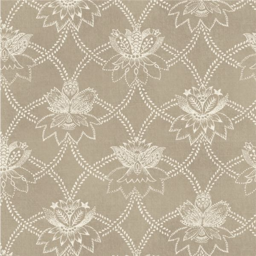

Generating prompts:  31%|███       | 15/49 [09:45<20:59, 37.05s/it]

a red and yellow floral pattern with birds and flowers, in style of thawan duchanee, intricate border, roman festival backdrop, 2009, british dragons, brown colours, persian design, ad image, central parted fringe, white borders, cambodia, centre image, 1 6 colors, payne's grey and venetian red, persian princess, from slumdog millionaire


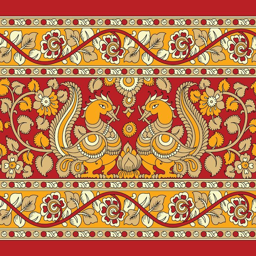

Generating prompts:  33%|███▎      | 16/49 [10:31<21:46, 39.60s/it]

a seamless paisley pattern in black and white, rococo decorations, chalk white skin, detailed - i, ( ( abstract ) ), featured on pinterest, intricate copper details, very ornamented, central parted fringe, on white paper, adornment, white borders, coloring page, wall ]


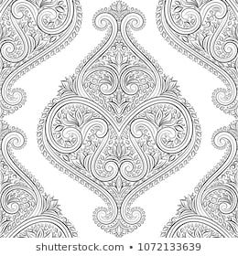

Generating prompts:  35%|███▍      | 17/49 [11:10<21:02, 39.44s/it]

a blue floral pattern with small flowers on it, ffffound, ottoman sultanate space marines, 中 元 节, gvc design, 8 h, desktop, cotton, style of andrew baker, charles baudelaire, catalog, 1801446143, 1 8 th century style, pfp, image, blue: 0.25


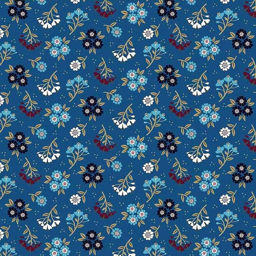

Generating prompts:  37%|███▋      | 18/49 [11:56<21:20, 41.30s/it]

a seamless floral pattern with blue and yellow flowers on a beige background, james jean style, floating. greenish blue, listing image, by Kathleen Allen, diatoms, james jean and wlop, context art, peppermint motif, google images


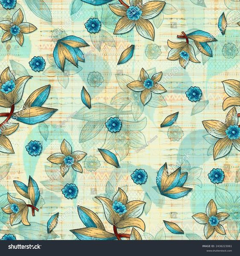

Generating prompts:  39%|███▉      | 19/49 [12:24<18:44, 37.50s/it]

a green and white floral pattern with leaves on a gray background, ffffound, 1 9 2 0 cloth style, here is one olive, taupe, oak, by Margaret Boden, from ramayan, jade green, bluestone walls, width 1 0 2 4, inspired by Ernest Heber Thompson


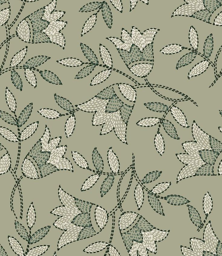

Generating prompts:  41%|████      | 20/49 [13:00<17:47, 36.83s/it]

a close up of a wallpaper with a pattern of flowers and leaves, light green mist, inspired by Thornton Oakley, white peacock feathers, muted color. minimalist, by John Broadley, muted colors with minimalism, 5000k white product lighting, height 1 7 8, catalog, fern, full-color, verbena


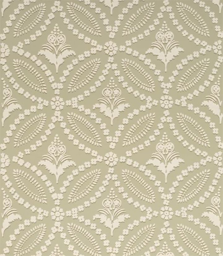

Generating prompts:  43%|████▎     | 21/49 [13:38<17:22, 37.22s/it]

a close up of a green and white wallpaper with a floral design, 1 8 5 4 crimea, ffffound, tonal topstitching, product - view, roll20, architecture of purification, height 1 7 8, color 1970, detail on scene, palace dance, from 1890, museum catalog


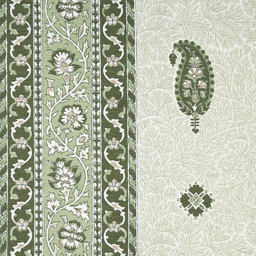

Generating prompts:  45%|████▍     | 22/49 [14:15<16:47, 37.31s/it]

a close up of a red and white fabric with a tree design, sanskrit, trending on dezeen, rug, subtle color variations, fern, trademarks and symbols, gambrel roof, wearing a white folkdrakt dress, blue and grey color scheme, stone etchings, trending on teemill, listing image, himalayas


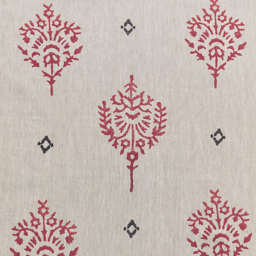

Generating prompts:  47%|████▋     | 23/49 [14:55<16:27, 37.97s/it]

a close up of a rug with a design on it, elegant slim beige shirt, inspired by Walter Crane, paper chrysanthemums, ffffound, hindu, by Inshō Dōmoto, light-brown skin, interior of a tent, beardsley, official product image, india, inspired by Louise Abbéma, often described as flame-like


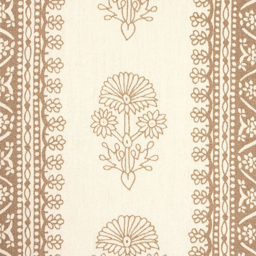

Generating prompts:  49%|████▉     | 24/49 [15:34<16:01, 38.46s/it]

a green and white striped wallpaper with a floral design, steampunk!!!! grainy texture, strathmore 2 0 0, bright castleton green, by Anni Albers, matt colors outdoor, ornate tiled architecture, ribbon, lime, 1 0 2 4 farben, cross-hatchings, ellora, lawn, terraced, by Sarah Morris, pine wood


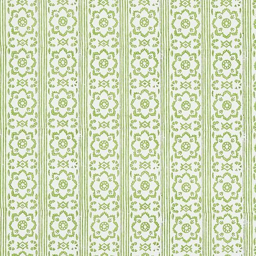

Generating prompts:  51%|█████     | 25/49 [16:21<16:18, 40.77s/it]

a close up of a white and blue rug with dots, ffffound, hindu, by Louise Abbéma, awnings, vertical orientation w 832, fern, trademarks and symbols, summer rain, joanna gaines


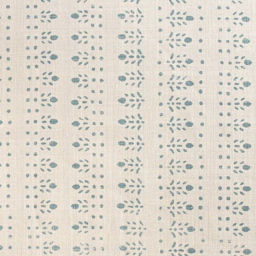

Generating prompts:  53%|█████▎    | 26/49 [16:51<14:23, 37.54s/it]

a green and white wallpaper with a pattern of trees, sukhothai costume, 1 9 7 0 s illustration, tonal topstitching, madagascar, inspired by Grytė Pintukaitė, 1 0 2 4 farben, cedar, from sengoku period, catalog, kaladesh, --width 1600, bangalore, product label


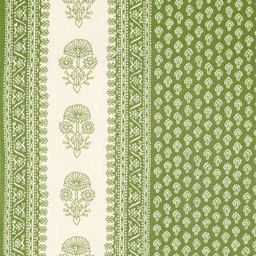

Generating prompts:  55%|█████▌    | 27/49 [17:34<14:26, 39.38s/it]

a close up of a wallpaper with a pattern of leaves, wearing a silk kurta, here is one olive, in a wheat field, ffffound, hindu, home page screenshot, sandstone, f11:10, fern, cedar, gold embroidery, sheet, thistle


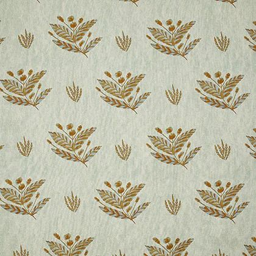

Generating prompts:  57%|█████▋    | 28/49 [18:14<13:47, 39.41s/it]

a close up of a blue and white floral pattern on a white background, ffffound, hannah af klint, wooden walls brass panels, teal, by Balcomb Greene, anthropomorphic cactus, putti, thistles, furniture design sheet, lithograph, rugs, puce and vermillion, houzz, burlap


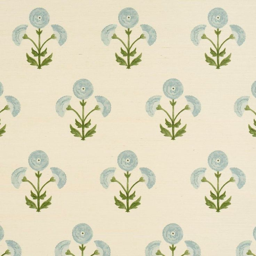

Generating prompts:  59%|█████▉    | 29/49 [18:57<13:31, 40.56s/it]

a close up of a white and blue floral pattern on a white background, greta thunberg, cold as ice! 🧊, 19th-century, gelatinous symmetrical, by Ernest Heber Thompson, blue walls, dorne, regency, ancient roman style, sage, color study, by Jessie Newbery, fern, 1 8 0 0 s


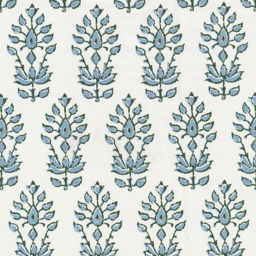

Generating prompts:  61%|██████    | 30/49 [19:45<13:33, 42.84s/it]

a rug with a floral design on it, at gentle dawn pink light, payne's grey and venetian red, inspired by Lewis Henry Meakin, symmetry features proportions, cottage hippie naturalist, escher style, very elegant & complex, coral red, james guilleard, quechua


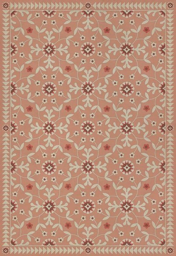

Generating prompts:  63%|██████▎   | 31/49 [20:17<11:53, 39.64s/it]

a blue and beige floral wallpaper with a pattern of flowers, trending on artforum, an area rug, wintry rumpelstiltskin, payne's grey and venetian red, trending on textures. com, brandywine school, by Anna Boch, intricate elegant, light blues, heise jinyao, 17th-century, ad image, sage


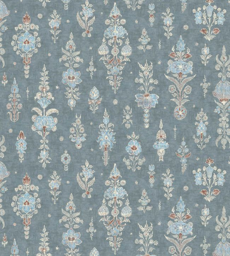

Generating prompts:  65%|██████▌   | 32/49 [20:58<11:20, 40.01s/it]

a close up of a white and green fabric with a pattern of flowers, kobalt blue, gambrel roof, by Laurel Burch, gear aurora, official product image, snowflakes, seaweed, tundra, award winning h-512 w-512 n-6, sea breeze rises in the air, symmetrically centered, fern


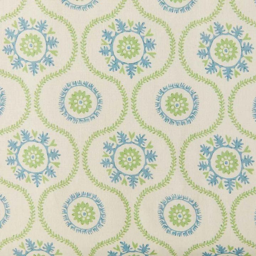

Generating prompts:  67%|██████▋   | 33/49 [21:35<10:27, 39.19s/it]

a close up of a pattern of red flowers on a green background, new release, asparagus, chesterfield, rubrum lillies, single pine, from the outside it looks folksy, exotic flora, inspired by Doris Boulton-Maude, tall spires, tulip, defence, bangalore


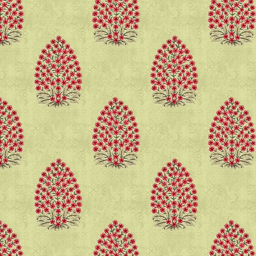

Generating prompts:  69%|██████▉   | 34/49 [22:12<09:36, 38.44s/it]

a close up of a white and black floral design on a piece of paper, by Félix Vallotton, by Jeanne du Maurier, white tunic, marigold, japanese collection product, inspired by Thornton Oakley, white and pink cloth, bandages, from 1890, zine, 1 8 8 1, taupe, creative commons attribution, botanic


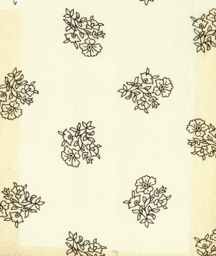

Generating prompts:  71%|███████▏  | 35/49 [22:59<09:35, 41.09s/it]

a close up of a floral pattern on a white background, greta thunberg, sublime but intricate design, light brown colors, kaladesh, light blue, inspired by Lizzy Ansingh, the scary empty liminal spaces, taj mahal, wallpaper aesthetic, laurels of glory, resplendent


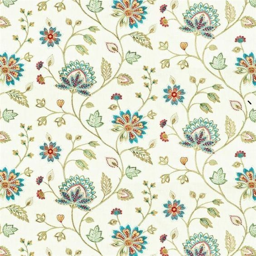

Generating prompts:  73%|███████▎  | 36/49 [23:34<08:28, 39.09s/it]

a close up of a white lace with flowers on it, 3d printed line texture, furniture design sheet, trending on pinterest. com, extremely high detail!!, light brown colors, very detailed!!, branching hallways, white: 0.5, walls are made of dry wall, detailed intricate block print


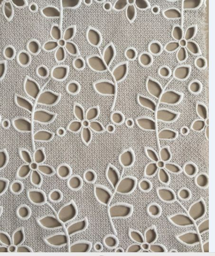

Generating prompts:  76%|███████▌  | 37/49 [24:05<07:20, 36.70s/it]

a close up of a white dress with gold embroidery and beads, highly detailed muted colors, trending on pinterest. com, highly detailed panel cuts, white wall complex, by Manjit Bawa, center of picture, sandstone, great pinterest photo, 8, white gold, peacock colors, top of pinterest


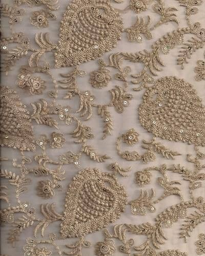

Generating prompts:  78%|███████▊  | 38/49 [24:42<06:45, 36.85s/it]

a close up of a gold and white floral embroidered fabric, ranjit ghosh, made of dried flowers, royal wedding, chamomile, flowers grow from the body, fine foliage lace, brown color, inspired by Juliette Wytsman, in wedding dresses, shikishi, garments


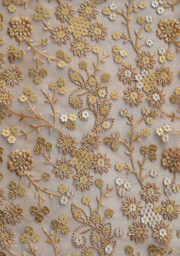

Generating prompts:  80%|███████▉  | 39/49 [25:16<05:58, 35.85s/it]

a close up of a white and gold fabric with a pattern, white marble highly detailed, indore, white marble walls, crystal color, golden and silver colors, michilin star, old stone wall, cheap design, silk screen, in bathroom, white flower, architectural painting, rococo mechanical and electronic, #


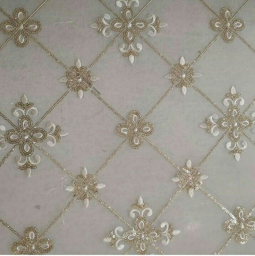

Generating prompts:  82%|████████▏ | 40/49 [25:58<05:41, 37.95s/it]

a close up of a floral pattern on a white background, beatrice blue, features intricate detail, paper chrysanthemums, sage, inspired by Fitz Henry Lane, kara walker james jean, super sophisticated texture, lined in cotton, gambrel roof, corals, trending on pinterest. com, oak acorns


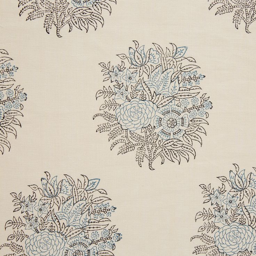

Generating prompts:  84%|████████▎ | 41/49 [26:35<05:00, 37.59s/it]

a blue and white wallpaper with a floral design, ffffound, gilmore girls aesthetic, rococo!, retaildesignblog.net, lace web, code, pretty clothing!, 9 9 designs, lilac, by Ai Weiwei, parchment paper, unique design, # rococo, white snow, wolff olins |


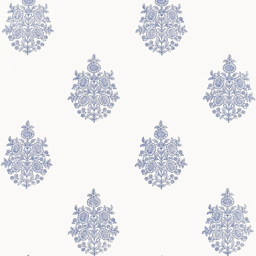

Generating prompts:  86%|████████▌ | 42/49 [27:20<04:37, 39.65s/it]

a close up of a wallpaper with a pattern of flowers, sea green color theme, minarets, ffffound, elegant intricate diagrams, images on the sales website, in a white room, ice color scheme, peppermint motif, the backrooms liminal space, green: 0.5, tile floor


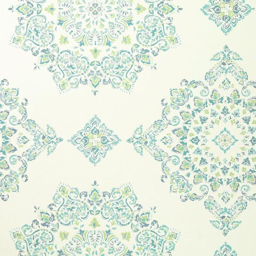

Generating prompts:  88%|████████▊ | 43/49 [27:54<03:48, 38.11s/it]

a blue and white floral pattern on a white background, greta thunberg, paper chrysanthemums, illustratio, trending on textures. com, but minimalist, indigo and venetian red, by James Paterson, first draft, blues. beautiful, foliage clothing, burlap, width 1 0 2 4, porcelain


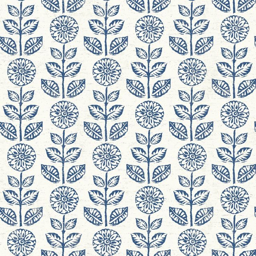

Generating prompts:  90%|████████▉ | 44/49 [28:34<03:12, 38.48s/it]

a blue and white floral wallpaper with a white flower, wolff olins |, twitter, marigold, 2 color, daysies, mint, by Jane Kelly, image on the store website, null, mat drawing paper, chloe price, cotton fabric


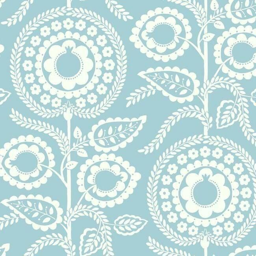

Generating prompts:  92%|█████████▏| 45/49 [29:10<02:31, 37.77s/it]

a green and white paisley border with birds and flowers, ffffound, grasping intricate filigree, technical vest, ganesh, template sheet, its name is greeny, it\'s name is greeny, aristocrat, inspired by Abraham Hondius, high detail 1024, dollar bill


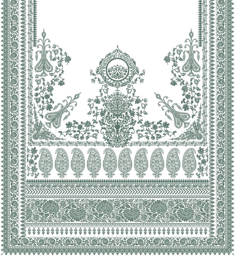

Generating prompts:  94%|█████████▍| 46/49 [29:44<01:50, 36.67s/it]

a close up of a table cloth with a blue and white design, inspired by George Hendrik Breitner, sold on sukebannyc, rugs, brown and white color scheme, depicting a flower, wearing an old tunic, by Louise Abbéma, hindu, product view, front back view and side view, image on the store website, sahara, houzz


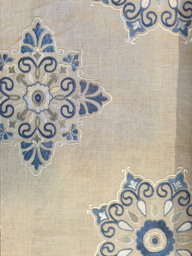

Generating prompts:  96%|█████████▌| 47/49 [30:26<01:16, 38.48s/it]

there is a drawing of a flower with a black and white design, kilian eng vibrant colours, strong blue and orange colors, by Stanley Twardowicz, ultrafine hyperrealistic details, tulips, streaming on twitch, art print, lots blue colours, by Felicity Charlton, this painting is a large canvas, il, #illustration, poppies, navy, illustrator


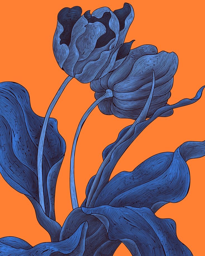

Generating prompts:  98%|█████████▊| 48/49 [31:12<00:40, 40.63s/it]

a black and white abstract painting of wavy lines, by Ed Roth, 1970s hippie cloth style, by Osamu Tezuka, snakeskin, inspired by Willem de Kooning, reaction diffusion, 1 9 6 5, animal skins, skeumorphism, memphis group, sixties


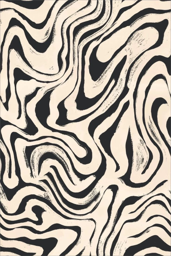

Generating prompts: 100%|██████████| 49/49 [31:47<00:00, 38.92s/it]





Generated 49 prompts and renamed your files, enjoy!


In [ ]:
#@title Batch process a folder of images 📁 -> 📝

#@markdown This will generate prompts for every image in a folder and either save results
#@markdown to a desc.csv file in the same folder or rename the files to contain their prompts.
#@markdown The renamed files work well for [DreamBooth extension](https://github.com/d8ahazard/sd_dreambooth_extension)
#@markdown in the [Stable Diffusion Web UI](https://github.com/AUTOMATIC1111/stable-diffusion-webui).
#@markdown You can use the generated csv in the [Stable Diffusion Finetuning](https://colab.research.google.com/drive/1vrh_MUSaAMaC5tsLWDxkFILKJ790Z4Bl?usp=sharing)

import csv
import os
from IPython.display import clear_output, display
from PIL import Image
from tqdm import tqdm

folder_path = "/content/drive/My Drive/Rename_Images" #@param {type:"string"}
prompt_mode = 'best' #@param ["best","fast","classic","negative"]
output_mode = 'rename' #@param ["desc.csv","rename"]
max_filename_len = 128 #@param {type:"integer"}


def sanitize_for_filename(prompt: str, max_len: int) -> str:
    name = "".join(c for c in prompt if (c.isalnum() or c in ",._-! "))
    name = name.strip()[:(max_len-4)] # extra space for extension
    return name

ci.config.quiet = True

files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.JPG')] if os.path.exists(folder_path) else []
prompts = []
for idx, file in enumerate(tqdm(files, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    image = Image.open(os.path.join(folder_path, file)).convert('RGB')
    prompt = image_to_prompt(image, prompt_mode)
    prompts.append(prompt)

    print(prompt)
    thumb = image.copy()
    thumb.thumbnail([256, 256])
    display(thumb)

    if output_mode == 'rename':
        name = sanitize_for_filename(prompt, max_filename_len)
        ext = os.path.splitext(file)[1]
        filename = name + ext
        idx = 1
        while os.path.exists(os.path.join(folder_path, filename)):
            print(f'File {filename} already exists, trying {idx+1}...')
            filename = f"{name}_{idx}{ext}"
            idx += 1
        os.rename(os.path.join(folder_path, file), os.path.join(folder_path, filename))

if len(prompts):
    if output_mode == 'desc.csv':
        csv_path = os.path.join(folder_path, 'desc.csv')
        with open(csv_path, 'w', encoding='utf-8', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
            w.writerow(['image', 'prompt'])
            for file, prompt in zip(files, prompts):
                w.writerow([file, prompt])

        print(f"\n\n\n\nGenerated {len(prompts)} prompts and saved to {csv_path}, enjoy!")
    else:
        print(f"\n\n\n\nGenerated {len(prompts)} prompts and renamed your files, enjoy!")
else:
    print(f"Sorry, I couldn't find any images in {folder_path}")
